In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
    import seaborn as sns

# Give Me Some Credit

In [85]:
df = pd.read_csv("GiveMeSomeCredit/cs-training.csv")

In [86]:
df

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
149995,149996,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149996,149997,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149997,149998,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0
149998,149999,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


* SeriousDlqin2yrs - просрочка на 90+ дней из-за серьезного правонарушения или хуже(за 2 года)
* RevolvingUtilizationOfUnsecuredLines - отношение общего баланса на кредитках и креедитных линиях к кредитному лимиту
* age - возраст заемщика в годах
* NumberOfTime30-59DaysPastDueNotWorse - сколько раз просрочил на 30-59 дней (за 2 года)
* DebtRatio - платежы по кредитам, алименты, расходы на жизнь делить на ЗП гросс
* MonthlyIncome - ежемесячный доход
* NumberOfOpenCreditLinesAndLoans - количество открытых кредитов и кредитных линий
* NumberOfTimes90DaysLate - количество просрочек на 90+ дней
* NumberRealEstateLoansOrLines - кредиты на real estate
* NumberOfTime60-89DaysPastDueNotWorse - просрочка оплаты на 60-89
* NumberOfDependents - количество людей, которые зависят(супруг, дети и т.д.)

<AxesSubplot:xlabel='SeriousDlqin2yrs', ylabel='Count'>

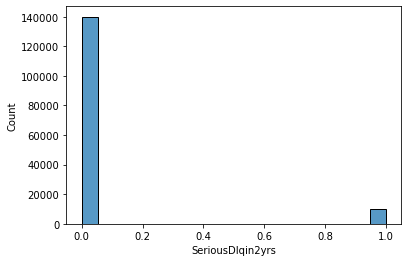

In [87]:
sns.histplot(df['SeriousDlqin2yrs'])

In [88]:
print(f"Dataset has the following shape {df.shape}")

Dataset has the following shape (150000, 12)


In [89]:
class_balance = df['SeriousDlqin2yrs'].value_counts()
class_balance

0    139974
1     10026
Name: SeriousDlqin2yrs, dtype: int64

In [90]:
print(f"Как видим, в наших данных {(class_balance[1]/len(df)*100):.3}%",
      "наблюдений с дефолтом.")

Как видим, в наших данных 6.68% наблюдений с дефолтом.


<AxesSubplot:xlabel='SeriousDlqin2yrs', ylabel='Count'>

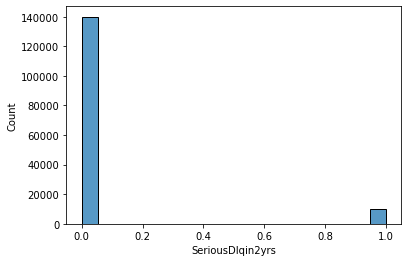

In [91]:
sns.histplot(df['SeriousDlqin2yrs'])

# ML Finhack

In [92]:
df = pd.read_csv("finhack/train_LTFS.csv")

In [93]:
df.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-84,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,Self employed,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,Self employed,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-77,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


* UniqueID - айдишник
* loandefault Payment default in the first EMI on due date disbursedamount Amount of Loan disbursed 
* asset_cost Cost of the Asset 
* ltv -  Loan to Value of the asset branchid Branch where the loan was disbursed 
* supplier_id -  Vehicle Dealer where the loan was disbursed 
* manufacturer_id - Vehicle manufacturer(Hero, Honda, TVS etc.) 
* Currentpincode - Current pincode of the customer 
* Date.of.Birth - Date of birth of the customer 
* Employment.Type - Employment Type of the customer (Salaried/Self Employed) 
* DisbursalDate - Date of disbursement StateID State of disbursement 
* EmployeecodeID -  Employee of the organization who logged the disbursement 
* MobileNoAvlFlag - if Mobile no. was shared by the customer then flagged as 1 
* Aadharflag - if aadhar was shared by the customer then flagged as 1 
* PANflag - if pan was shared by the customer then flagged as 1 
* VoterIDflag -  if voter was shared by the customer then flagged as 1 
* Drivingflag - if DL was shared by the customer then flagged as 1 
* Passportflag  - if passport was shared by the customer then flagged as 1 
* PERFORMCNS.SCORE - Bureau Score 
* PERFORMCNS.SCORE.DESCRIPTION - Bureau score description 
* PRI.NO.OF.ACCTS - count of total loans taken by the customer at the time of disbursement Primary accounts are those which the customer has taken for his personal use 
* PRI.ACTIVE.ACCTS -  count of active loans taken by the customer at the time of disbursement 
* PRI.OVERDUE.ACCTS - count of default accounts at the time of disbursement 
* PRI.CURRENT.BALANCE - total Principal outstanding amount of the active loans at the time of disbursement 
*  PRI.SANCTIONED.AMOUNT - total amount that was sanctioned for all the loans at the time of disbursement 
* PRI.DISBURSED.AMOUNT - total amount that was disbursed for all the loans at the time of disbursement 
* SEC.NO.OF.ACCTS - count of total loans taken by the customer at the time of disbursement Secondary accounts are those which the customer act as a co-applicant or gaurantor 
* SEC.ACTIVE.ACCTS - count of active loans taken by the customer at the time of disbursement 
* SEC.OVERDUE.ACCTS - count of default accounts at the time of disbursement 
* SEC.CURRENT.BALANCE - total Principal outstanding amount of the active loans at the time of disbursement 
* SEC.SANCTIONED.AMOUNT - total amount that was sanctioned for all the loans at the time of disbursement 
* SEC.DISBURSED.AMOUNT - total amount that was disbursed for all the loans at the time of disbursement 
* PRIMARY.INSTAL.AMT - EMI Amount of the primary loan 
* SEC.INSTAL.AMT - EMI Amount of the secondary loan 
* NEW.ACCTS.IN.LAST.SIX.MONTHS - New loans taken by the customer in last 6 months before the disbursment 
* DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS - Loans defaulted in the last 6 months 
* AVERAGE.ACCT.AGE - Average loan tenure 
* CREDIT.HISTORY.LENGTH - Time since first loan 
* NO.OFINQUIRIES - Enquries done by the customer for loans

In [94]:
print(f"Dataset has the following shape {df.shape}")

Dataset has the following shape (233154, 41)


In [95]:
class_balance = df['loan_default'].value_counts()
class_balance

0    182543
1     50611
Name: loan_default, dtype: int64

In [96]:
print(f"Как видим, в наших данных {(class_balance[1]/len(df)*100):.3}%",
      "наблюдений с дефолтом.")

Как видим, в наших данных 21.7% наблюдений с дефолтом.


# Credit Card Default

In [97]:
df = pd.read_csv("credit_default.csv")

In [98]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,dpnm
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


* dpnm - default payment (TARGET)
* LIMIT_BAL - it includes both the individual consumer credit and his/her family (supplementary) credit
* Sex -  (1 = male; 2 = female) 
* Education - (1 = graduate school; 2 = university; 3 = high school; 4 = others) 
* MARRIAGE - (1 = married; 2 = single; 3 = others)
* Age - (year)
* PAY_1-PAY_6 - History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: PAY_1 = the repayment status in September, 2005; PAY_2 = the repayment status in August, 2005; . . .;PAY_6 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above. 
* BILL_AMT1-BILL_AMT6 - Amount of bill statement (NT dollar). BILL_AMT1 = amount of bill statement in September, 2005; BILL_AMT2 = amount of bill statement in August, 2005; . . .; BILL_AMT6 = amount of bill statement in April, 2005. 
* PAY_AMT1-PAY_AMT6 - Amount of previous payment (NT dollar). PAY_AMT1 = amount paid in September, 2005; PAY_AMT2 = amount paid in August, 2005; . . .;PAY_AMT6 = amount paid in April, 2005. 

In [99]:
print(f"Dataset has the following shape {df.shape}")

Dataset has the following shape (30000, 25)


In [100]:
class_balance = df['dpnm'].value_counts()
class_balance

0    23364
1     6636
Name: dpnm, dtype: int64

In [101]:
print(f"Как видим, в наших данных {(class_balance[1]/len(df)*100):.3}%",
      "наблюдений с дефолтом.")

Как видим, в наших данных 22.1% наблюдений с дефолтом.


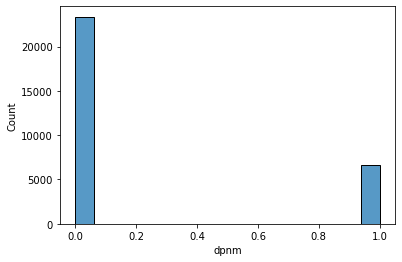

In [102]:
_ = sns.histplot(df['dpnm'])